```
python inference/create_embeddings.py --config_file="configs/256_resnet50.yml" GPU_IDS [0] DATASETS.ROOT_DIR '/home/altex/Codes/build-TrafficEngine-Desktop-Debug/11/' TEST.IMS_PER_BATCH 128 OUTPUT_DIR 'outputs11' TEST.ONLY_TEST True MODEL.PRETRAIN_PATH "/mnt/DD3/Centroid-reid/market1501_resnet50_256_128_epoch_120.ckpt"
```

In [165]:
import numpy as np 
from matplotlib import pyplot as plt 
import os 
import shutil
import glob 
%matplotlib inline 

In [170]:
data_paths = []
embedings = [] 
norms = [] 
for folder_path in ['outputs_onnx']:
    data_path1 = np.load(f'{folder_path}/paths.npy')
    embedings1 = np.load(f'{folder_path}/embeddings.npy')
    norms1 = embedings1/np.linalg.norm(embedings1,keepdims=True,axis=-1)
    data_paths.append(data_path1)
    embedings.append(embedings1)
    norms.append(norms1)
database_embeds = np.concatenate(embedings,0)
database_norms = np.concatenate(norms,0)
database_paths = np.concatenate(data_paths,0)
print(database_embeds.shape)
for j in range(len(norms)):
    print(data_paths[j][0])
    norm = np.mean(norms[j],0)
    norm = norm/np.linalg.norm(norm,axis=-1)
    if not os.path.exists(str(j)):
        os.makedirs(str(j))
    
    with open(str(j)+'/embed.txt','w') as f:
        for t in norm[0]:
            f.write(str(t))
            f.write(' ')

(106, 1, 512)
/home/altex/Codes/FaceRecognition_Detection/InsightFace_Pytorch/data/0_CameraEvent_2024-06-02 15:20:15#1091277#0000020.jpg


In [171]:
data_path1 = np.load(f'outputs_onnx/paths.npy')
embedings1 = np.load(f'outputs_onnx/embeddings.npy')
norms1 = embedings1/np.linalg.norm(embedings1,keepdims=True,axis=-1)

In [166]:
cpp_embeds1 = [] 
cpp_data_path1 = []
for fpath in glob.glob('/home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_4/*.txt'):
    cpp_data_path1.append(fpath.replace('.txt','.jpg'))
    with open(fpath,'r') as f:
        line = f.readline().strip().split(' ')
        emb = np.array([[float(c) for c in line]])
        cpp_embeds1.append(emb)
cpp_embeds1 = np.array(cpp_embeds1)
cpp_norms1 = cpp_embeds1/np.linalg.norm(cpp_embeds1,keepdims=True,axis=-1)
print(cpp_embeds1.shape)
 
    

(4, 1, 512)


In [167]:
cpp_embeds2 = [] 
cpp_data_path2 = []
for fpath in glob.glob('/home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_6/*.txt'):
    cpp_data_path2.append(fpath.replace('.txt','.jpg'))
    with open(fpath,'r') as f:
        line = f.readline().strip().split(' ')
        emb = np.array([[float(c) for c in line]])
        cpp_embeds2.append(emb)
cpp_embeds2 = np.array(cpp_embeds2)
cpp_norms2 = cpp_embeds2/np.linalg.norm(cpp_embeds2,keepdims=True,axis=-1)
print(cpp_embeds2.shape)
 
    

(4, 1, 512)


Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_4/f2_234_1.jpg
Num matched =  0


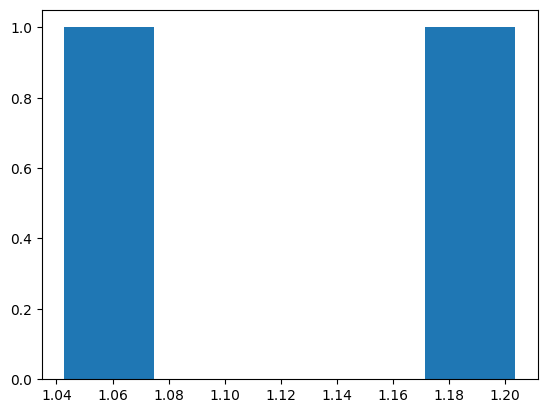

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_4/f2_235_1.jpg
Num matched =  0


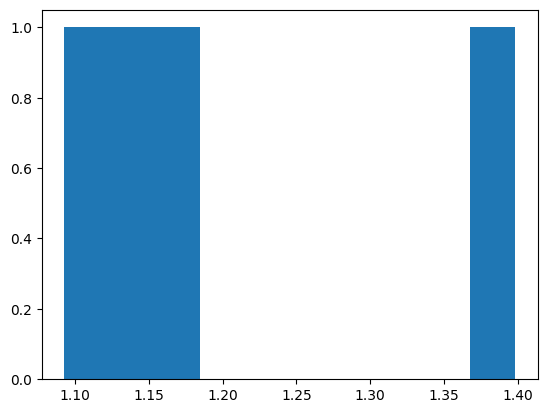

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_4/f2_241_1.jpg
Num matched =  4


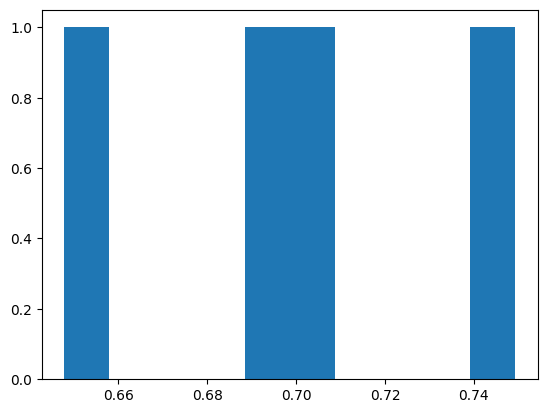

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_4/f2_276_11.jpg
Num matched =  2


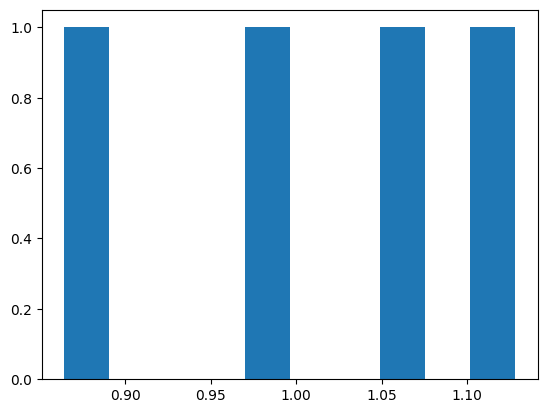

In [168]:
n = 9
f = 0
for n in range(len(norms1)):
    target = norms1[n]
    print("Search for :" ,cpp_data_path1[n])
    database = database_embeds
    data_path = database_paths
    cnt = 0
    if not os.path.exists(str(n)+"/match/"):
        os.makedirs(str(n)+"/match/")
    if not os.path.exists(str(n)+"/unmatch/"):
        os.makedirs(str(n)+"/unmatch/")
    distances = []
    for j in range(len(database)):
        
        s = ((target-database[j])**2).sum()
        distances.append(s)
        if  s<1.0:
            # print("Found: ", data_path[j], s)
            cnt += 1
            shutil.copyfile(data_path[j], str(n)+"/match/"+data_path[j].split('/')[-1])

        else:
            pass 
            # shutil.copyfile(data_path[j], str(n)+"/unmatch/"+data_path[j].split('/')[-1])
            # print("Not match: ", data_path[j], s)
    print("Num matched = ",cnt)
    plt.hist(distances)
    plt.show()

In [63]:
for n in range(len(norms1)):
    target = norms1[n]
    s = ((target-norms1.mean(0,keepdims=True))**2).sum()
    print("Distance = ",s)

Distance =  0.28322297
Distance =  0.6289497
Distance =  0.5534455
Distance =  0.42619416
Distance =  0.31594497
Distance =  0.27357712
Distance =  0.31697097
Distance =  0.56063265
Distance =  0.40644643
Distance =  0.42438716
Distance =  0.68952346
Distance =  0.4951896
Distance =  0.6425369
Distance =  0.39920092
Distance =  0.2698068
Distance =  0.46476912
Distance =  0.30780506
Distance =  0.3539266
Distance =  0.4633932
Distance =  0.6027293
Distance =  0.6837457
Distance =  0.4222824
Distance =  0.4435432
Distance =  0.2821344
Distance =  0.28152147
Distance =  0.34550598
Distance =  0.38870496
Distance =  0.41525418
Distance =  0.363266
Distance =  0.47809362


In [196]:
data_path = np.load('/home/altex/Codes/centroids-reid/outputs_samples/paths.npy')
embedings = np.load('/home/altex/Codes/centroids-reid/outputs_samples/embeddings.npy')
norms = embedings/np.linalg.norm(embedings,keepdims=True,axis=-1)

In [11]:
cpp_embeds = [] 
with open('/home/altex/Desktop/samples/black.jpg.txt','r') as f:
    line = f.readline().strip().split(' ')
    cpp_embeds = np.array([[float(c) for c in line]])
    print(cpp_embeds.shape)
 
    

FileNotFoundError: [Errno 2] No such file or directory: '/home/altex/Desktop/samples/black.jpg.txt'

In [199]:
np.sum(embedings - cpp_embeds)

-0.14422082842950792

In [192]:
embedings

array([[-0.5550021 , -0.100499  , -0.06019082, ..., -0.27841905,
        -0.8600723 , -0.753406  ]], dtype=float32)

In [193]:
cpp_embeds

array([[-0.554978 , -0.100482 , -0.0601774, ..., -0.277132 , -0.859835 ,
        -0.753353 ]])